In [1]:
import numpy as np
import gym
import random 
import matplotlib.pyplot as plt
from sudokuEnv import FixedSudokuEnv

In [7]:
class MonteCarloAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_table = {}  # Stores Q-values
        self.returns = {}  # Stores returns for each state-action pair
        self.total_rewards = []  # To track total rewards per episode

    def get_state_key(self, state):
        return tuple(map(tuple, state))

    def choose_action(self, state):
        state_key = self.get_state_key(state)

        # Epsilon-greedy policy for action selection
        if random.uniform(0, 1) < self.epsilon:
            empty_cells = self.env.get_empty_cells()
            if not empty_cells:
                return None
            row, col = random.choice(empty_cells)
            possible_numbers = self.env.get_possible_numbers(row, col)
            if not possible_numbers:
                return None
            num = random.choice(possible_numbers)
            action = row * 6 * 6 + col * 6 + (num - 1)
            return action
        else:
            q_values = self.q_table.get(state_key, {})
            if not q_values:
                empty_cells = self.env.get_empty_cells()
                if not empty_cells:
                    return None
                row, col = random.choice(empty_cells)
                possible_numbers = self.env.get_possible_numbers(row, col)
                if not possible_numbers:
                    return None
                num = random.choice(possible_numbers)
                action = row * 6 * 6 + col * 6 + (num - 1)
                return action
            max_q = max(q_values.values(), default=0)
            best_actions = [action for action, q in q_values.items() if q == max_q]
            return random.choice(best_actions)

    def generate_episode(self):
        episode = []
        state = self.env.reset()  # Initialize state
        done = False

        while not done:
            action = self.choose_action(state)  # Choose action based on policy
            if action is None:  # Handle case where no valid action is available
                break
            next_state, reward, done, _ = self.env.step(action)  # Take action
            episode.append((state, action, reward))  # Store (state, action, reward)
            state = next_state  # Move to the next state
        
        return episode

    def learn(self, episode):
        G = 0  # Initialize the return (discounted sum of rewards)
        visited_state_action_pairs = set()  # To keep track of (state, action) pairs already visited

        for t in reversed(range(len(episode))):  # Start from the end of the episode
            state, action, reward = episode[t]
            state_key = self.get_state_key(state)
            G = self.discount_factor * G + reward  # Compute the return
            
            if (state_key, action) not in visited_state_action_pairs:
                visited_state_action_pairs.add((state_key, action))

                # Initialize returns and Q-value for (state, action) if not already done
                if state_key not in self.returns:
                    self.returns[state_key] = {}
                if action not in self.returns[state_key]:
                    self.returns[state_key][action] = []

                # Append the return for this (state, action)
                self.returns[state_key][action].append(G)

                # Update Q-value as the average of returns
                avg_return = np.mean(self.returns[state_key][action])
                if state_key not in self.q_table:
                    self.q_table[state_key] = {}
                self.q_table[state_key][action] = avg_return

    def train(self, episodes):
        for episode_num in range(episodes):
            episode = self.generate_episode()  # Generate an episode
            total_reward = sum([reward for _, _, reward in episode])  # Sum the rewards of the episode
            self.learn(episode)  # Learn from the episode
    
            self.total_rewards.append(total_reward)  # Track the total reward
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)  # Decay epsilon
            
            # Print only every 1000 episodes to avoid flooding the console
            if (episode_num + 1) % 1000 == 0:
                print(f"Episode {episode_num + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {self.epsilon:.4f}")

    def test(self):
        state = self.env.reset()
        done = False
        step = 0
        total_reward = 0
        self.epsilon = 0  # Set epsilon to 0 (greedy policy) for testing
        print("\nBắt đầu kiểm tra:")
        while not done:
            action = self.choose_action(state)
            if action is None:
                print("Không có hành động hợp lệ.")
                break
            state, reward, done, _ = self.env.step(action)
            total_reward += reward
            step += 1
            print(f"Bước {step}: Hành động {action}, Reward: {reward}")
            self.env.render()
        print(f"Total Reward: {total_reward}")

    def plot_mean_rewards(self, window=50):
        mean_rewards = []
        for i in range(0, len(self.total_rewards), window):
            mean = np.mean(self.total_rewards[i:i + window])
            mean_rewards.append(mean)

        plt.ioff()  # Ensure non-interactive mode
        plt.figure()
        plt.plot(mean_rewards)
        plt.xlabel('Cụm Episode (Mỗi 50 episode)')
        plt.ylabel('Phần Thưởng Trung Bình')
        plt.title('Phần Thưởng Trung Bình theo Cụm Episode')
        plt.grid(True)
        plt.show()


In [10]:
env = FixedSudokuEnv()
agent = MonteCarloAgent(env)
agent.train(episodes=50000)



Episode 1000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 2000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 3000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 4000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 5000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 6000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 7000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 8000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 9000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 10000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 11000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 12000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 13000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 14000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 15000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 16000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 17000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 18000/50000, Total Reward: 7, Epsilon: 0.0100
Episode 19000/50000, Total Reward: 7,

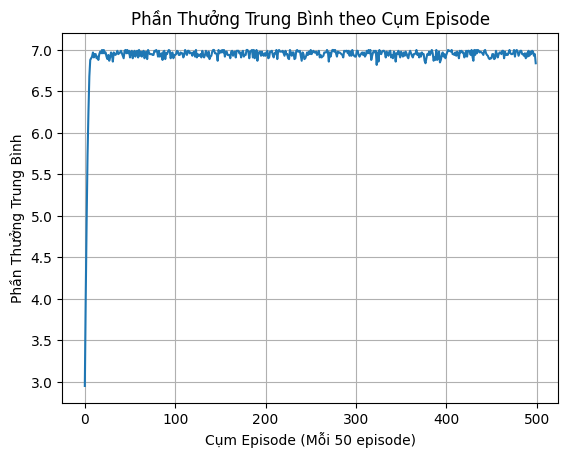

In [11]:
agent.plot_mean_rewards(window=100)
